In [1]:
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_and_center_dataset(filename):
    x = np.load(filename)
    x = x - np.mean(x, axis=0)
    return x

In [3]:
x = load_and_center_dataset("YaleB_32x32.npy")
len(x)
len(x[0])
np.average(x)

-8.315174931741023e-17

In [4]:
def get_covariance(dataset):
    cov = (np.dot(np.transpose(dataset), dataset)/(len(dataset)-1))
    return cov

In [5]:
x = np.array([[1,2,5],[3,4,7]])
get_covariance(x)

array([[10., 14., 26.],
       [14., 20., 38.],
       [26., 38., 74.]])

In [6]:
def get_eig(S, m):
    SS = eigh(S, subset_by_index=[len(S)-m, len(sss)-1])
    lamb = np.diag( np.sort(SS[0])[::-1] )
    U = np.fliplr(SS[1])
    return lamb, U

In [7]:
sss = get_covariance(load_and_center_dataset("YaleB_32x32.npy"))
ss= eigh(sss , subset_by_index=[len(sss)-2, len(sss)-1])
np.diag( np.sort(ss[0])[::-1] )

array([[1369142.41612494,       0.        ],
       [      0.        , 1341168.50476773]])

In [8]:
np.fliplr(ss[1])

array([[-0.01304065, -0.0432441 ],
       [-0.01177219, -0.04342345],
       [-0.00905278, -0.04095089],
       ...,
       [ 0.00148631,  0.03622013],
       [ 0.00205216,  0.0348093 ],
       [ 0.00305951,  0.03330786]])

In [9]:
get_eig( get_covariance(load_and_center_dataset("YaleB_32x32.npy")) , 2)

(array([[1369142.41612494,       0.        ],
        [      0.        , 1341168.50476773]]),
 array([[-0.01304065, -0.0432441 ],
        [-0.01177219, -0.04342345],
        [-0.00905278, -0.04095089],
        ...,
        [ 0.00148631,  0.03622013],
        [ 0.00205216,  0.0348093 ],
        [ 0.00305951,  0.03330786]]))

In [10]:
def get_eig_prop(S, prop):
    SS= eigh(S , subset_by_value=[prop*S.trace(), np.inf])
    lamb = np.diag( np.sort(SS[0])[::-1] )
    U = np.fliplr(ss[1])
    return lamb, U

In [11]:
sss = get_covariance(load_and_center_dataset("YaleB_32x32.npy"))
x = sss.trace() #sum of diagonals in square matrices --> the eigvals
#for each eignval divide by trace and want it if less than .01
#want equation all less than .07

ss= eigh(sss , subset_by_value=[0.07*x,np.inf])
np.diag( np.sort(ss[0])[::-1] )

array([[1369142.41612494,       0.        ],
       [      0.        , 1341168.50476773]])

In [12]:
lambb, UU = get_eig_prop(get_covariance(load_and_center_dataset("YaleB_32x32.npy")), 0.07)

In [13]:
def project_image(image, U):
    sum_aij= np.dot(np.transpose(U), image)
    return np.dot( uu,sum_aij )

In [14]:
sss = get_covariance(load_and_center_dataset("YaleB_32x32.npy"))
ss= eigh(sss , subset_by_index=[len(sss)-2, len(sss)-1])
uu = np.fliplr(ss[1])
x = load_and_center_dataset("YaleB_32x32.npy")
image = x[0]

sum_aij= np.dot(np.transpose(uu), image)

np.dot( uu,sum_aij )

array([6.84122225, 4.83901287, 1.41736694, ..., 8.75796534, 7.45916035,
       5.4548656 ])

In [15]:
lambb, UU = get_eig_prop(get_covariance(load_and_center_dataset("YaleB_32x32.npy")), 0.07)
project_image(x[0], UU)

array([6.84122225, 4.83901287, 1.41736694, ..., 8.75796534, 7.45916035,
       5.4548656 ])

In [16]:
def display_image(orig, proj):
    fig, axs = plt.subplots(1,2, sharey=True)
    im_o= axs[0].imshow( np.reshape(orig, (32,32), order="F"), aspect='equal') 
    im_p= axs[1].imshow( np.reshape(proj, (32,32), order="F"), aspect='equal')
    axs[0].set_title("Original")
    axs[1].set_title("Projection")
    fig.colorbar(im_o, ax=axs[0], shrink=0.7)
    fig.colorbar(im_p, ax=axs[1], shrink=0.7)
    fig.show()

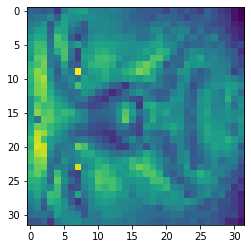

In [17]:
plt.imshow( np.reshape(x[0],(32,32)), aspect='equal') 

/var/folders/5v/9316dl_532b51_tw99qt9mzh0000gn/T/ipykernel_29487/2282023317.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


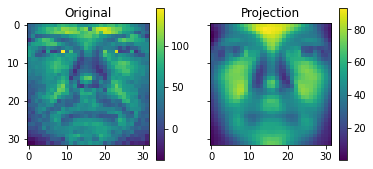

In [18]:
fig, axs = plt.subplots(1,2, sharey=True)
im_o= axs[0].imshow( np.reshape(x[0],(32,32), order="F"), aspect='equal') 
im_p = axs[1].imshow( np.reshape(project_image(x[0], UU),(32,32), order="F"), aspect='equal')
axs[0].set_title("Original")
axs[1].set_title("Projection")
fig.colorbar(im_o, ax=axs[0], shrink=0.7)
fig.colorbar(im_p, ax=axs[1], shrink=0.7)
fig.show()

/var/folders/5v/9316dl_532b51_tw99qt9mzh0000gn/T/ipykernel_29487/1491632167.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


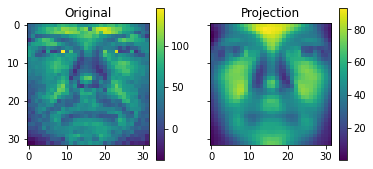

In [19]:
x = load_and_center_dataset('YaleB_32x32.npy') 
S = get_covariance(x)
Lambda, U = get_eig(S, 2)
projection = project_image(x[0], U)
display_image(x[0], projection)